In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Dataset Fix.csv')
data_visual = data

In [ ]:
data.head()

,Sex,Age,Height,Weight,Status
0,1,0,54.0,4.0,Gizi Baik
1,1,0,51.5,4.0,Overweight
2,1,0,56.0,5.2,Gizi Baik
3,1,0,58.0,5.8,Gizi Baik
4,0,0,62.0,5.9,Gizi Baik


In [ ]:
data.shape

(900, 5)

In [ ]:
data.isnull().any()

Sex       False
Age       False
Height    False
Weight    False
Status    False
dtype: bool

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
sns.__version__

'0.12.2'

In [ ]:
def convert_status_to_description(x):
    if x['Status'] == 'Stunting':
        return 0
    elif x['Status'] == 'Overweight':
        return 1
    elif x['Status'] == 'Gizi Baik':
        return 2
    elif x['Status'] == 'Underweight':
        return 3
data_visual['Index'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head(100)

,Sex,Age,Height,Weight,Status,Index
0,1,0,54.0,4.0,Gizi Baik,2
1,1,0,51.5,4.0,Overweight,1
2,1,0,56.0,5.2,Gizi Baik,2
3,1,0,58.0,5.8,Gizi Baik,2
4,0,0,62.0,5.9,Gizi Baik,2
...,...,...,...,...,...,...
95,1,1,74.0,9.5,Gizi Baik,2
96,1,1,80.0,9.5,Gizi Baik,2
97,0,1,85.6,9.5,Underweight,3
98,0,1,84.4,9.5,Underweight,3


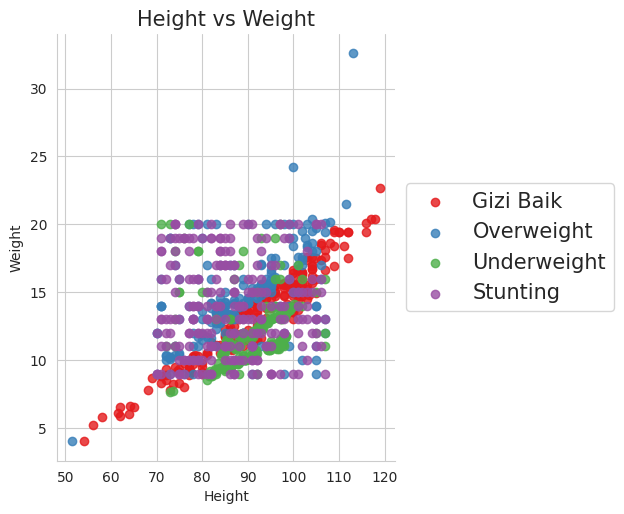

In [ ]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=data_visual,
           fit_reg=False,
           hue='Status',
           legend=False,
           palette='Set1',
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

In [ ]:
people = data_visual['Sex'].value_counts()
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


1    477
0    423
Name: Sex, dtype: int64

In [ ]:
categories = data_visual['Status'].value_counts()
categories

Underweight    258
Stunting       237
Overweight     206
Gizi Baik      199
Name: Status, dtype: int64

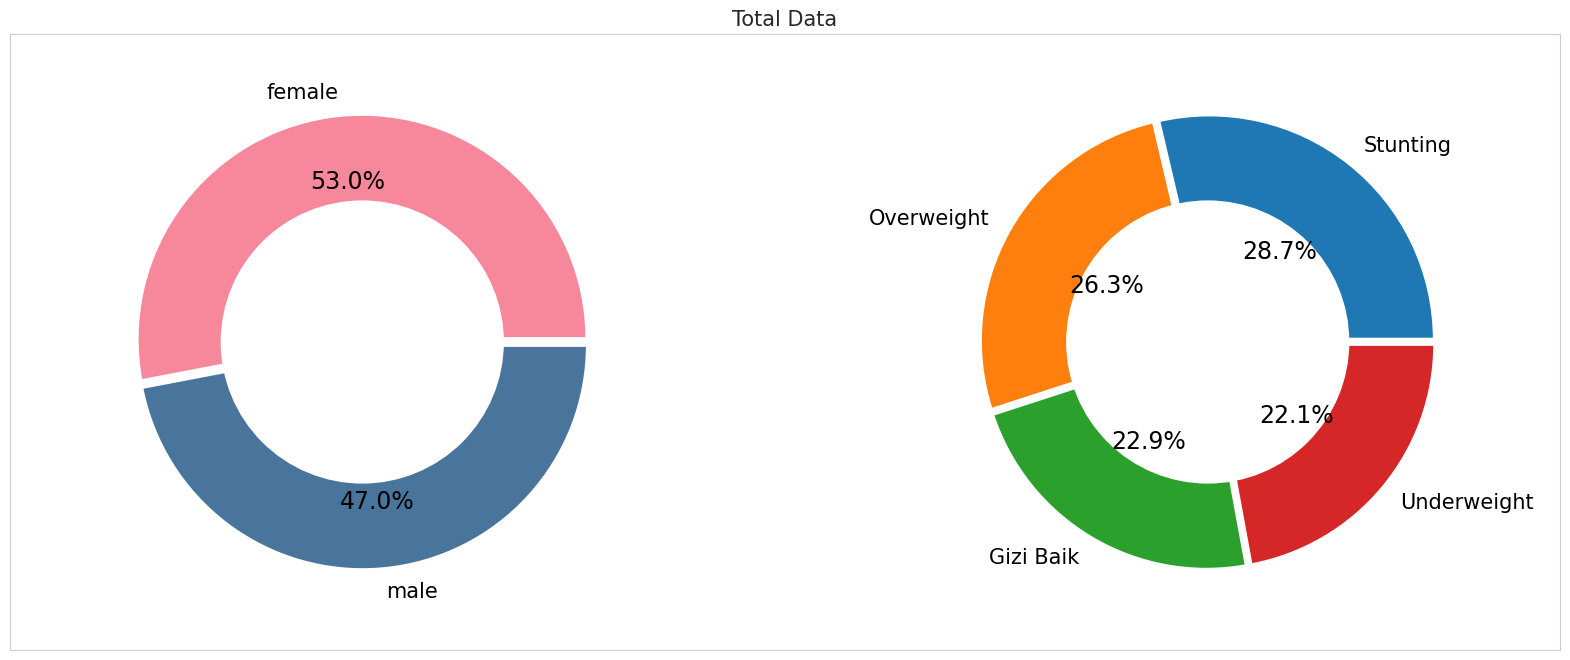

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# first pie-plot
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

# Second pie-plot
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Stunting','Overweight','Gizi Baik','Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,Sex,Age,Height,Weight,Status,Index
0,1,0,54.0,4.0,Gizi Baik,2
1,1,0,51.5,4.0,Overweight,1
2,1,0,56.0,5.2,Gizi Baik,2
3,1,0,58.0,5.8,Gizi Baik,2
4,0,0,62.0,5.9,Gizi Baik,2


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Status', 'Index'])
Y = df['Index']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X.iloc[:,0:-1] = std_sc.fit_transform(X.iloc[:,0:-1])

In [ ]:
X.head()

,Sex,Age,Height,Weight
0,0.941697,-1.798391,-3.493577,4.0
1,0.941697,-1.798391,-3.740282,4.0
2,0.941697,-1.798391,-3.296213,5.2
3,0.941697,-1.798391,-3.098849,5.8
4,-1.061913,-1.798391,-2.704120,5.9


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
y_pred_rfc = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[47,  6,  2,  6],
       [13, 29,  7,  1],
       [ 1,  2, 44,  2],
       [ 2,  7,  2, 54]])

In [ ]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

77.33333333333333

In [ ]:
def trees_in_forest_vs_acc(trees, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [ ]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.7644444444444445,
 0.7733333333333333,
 0.7688888888888888,
 0.7688888888888888,
 0.7688888888888888,
 0.7688888888888888]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.764444
1,200,0.773333
2,300,0.768889
3,500,0.768889
4,700,0.768889


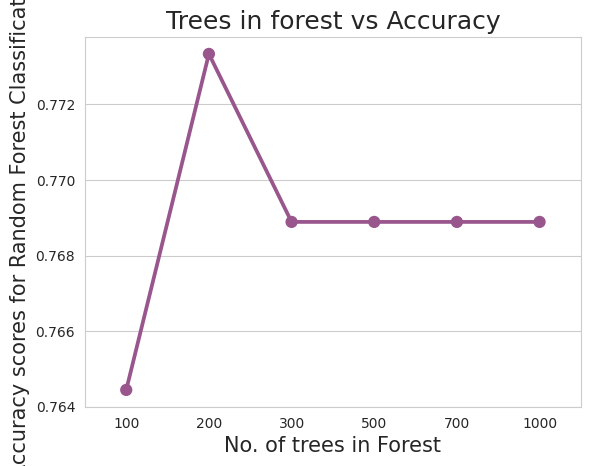

In [ ]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()

In [ ]:
def predict_mpg(config, model):

    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    y_pred = model.predict(df)

    if y_pred == 0:
        return 'Stunting'
    elif y_pred == 1:
        return 'Overweight'
    elif y_pred == 2:
        return 'Gizi Baik'
    elif y_pred == 3:
        return 'Underweight'

#     return y_pred

In [ ]:
config = {
    'Sex': [0],
    'Age': [2],
    'Height': [88],
    'Weight': [10]
}

predict_mpg(config, model)

'Underweight'

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 73.41 %


In [ ]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue

'Gizi Baik'